In [1]:
import os
import lmdb
import tkinter as tk
from tkinter import filedialog
import glob
import cv2
from pathlib import Path
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import mmcv
import h5py

In [5]:
# BASE_DIR = os.getcwd()
# root = tk.Tk()
# root.withdraw()

# FOLDER_PATH = filedialog.askdirectory(title="Select directory containing images")
FOLDER_PATH = "/mnt/d/Datasets/PVDN/images/"

In [2]:
hdf5_path = "/mnt/d/Datasets/PVDN/images_hdf5/images_lzf.hdf5"

print("Reading hdf5 from %s" % hdf5_path)

Reading hdf5 from /mnt/d/Datasets/PVDN/images_hdf5/images_lzf.hdf5


In [3]:
class my_dataset_HDF5(Dataset):
    def __init__(self, db_path):
        self.db_path = db_path
        self.env = None

    def _init_db(self):
        self.hf = h5py.File(self.db_path, "r")  # open a hdf5 file

    def read_hdf5(self, key):
        img_bytes = np.array(self.hf[str(key)])  # read image in bytes
        img = mmcv.imfrombytes(
            img_bytes, flag="color", channel_order="rgb"
        )  # convert to array
        return img

    def __getitem__(self, key):
        # Delay loading LMDB data until after initialization
        if self.env is None:
            self._init_db()

        return self.read_hdf5(key)

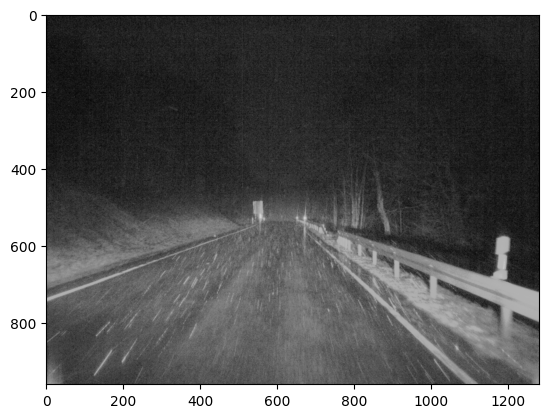

In [8]:
ds = my_dataset_HDF5(hdf5_path)
plt.imshow(ds["S00000_11"])
plt.show()